## Data Creation

In [ ]:
!pip install pdfplumber
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import docx
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Function for PDF File Loader

In [ ]:
def extract_text_from_pdf(file_path):
    with pdfplumber.open(file_path) as pdf:
        text = "\n".join(page.extract_text() for page in pdf.pages if page.extract_text())
    return text

Function for Docx File Loader

In [ ]:
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = "\n".join(para.text for para in doc.paragraphs)
    return text

In [ ]:
def dataset(dirname):
    data_list =[]
    for dir in os.listdir("Resume_Custom_Data"):
        for files in os.listdir(os.path.join('Resume_Custom_Data',dir)):
            file_path = os.path.join('Resume_Custom_Data',dir, files)
            if file_path.endswith(".pdf"):
                text = extract_text_from_pdf(file_path)
            elif file_path.endswith(".docx"):
                text = extract_text_from_docx(file_path)
            label= files.split('.')[0]
            data = {
                    'Text': text,
                    'label':dir
                }
            data_list.append(data)
    df = pd.DataFrame(data_list)
    return df

In [ ]:
df = pd.read_csv('/content/resume_data.csv')

In [ ]:
df

,Unnamed: 0,Text,label
0,0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
1,1,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
2,2,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
3,3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
4,4,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
...,...,...,...
75,75,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday
76,76,Seeking suitable positions in Workday HCM as ...,workday
77,77,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
78,78,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Text,0
label,0


## Visualization of Resumes Categories

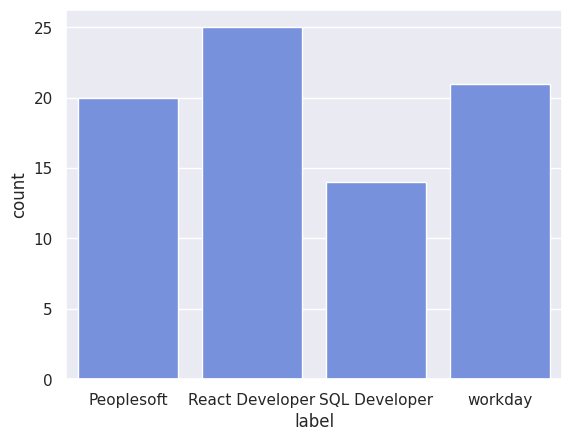

In [ ]:
sns.set_theme(style="darkgrid",palette="coolwarm")
sns.countplot(x = df['label'])
plt.show()

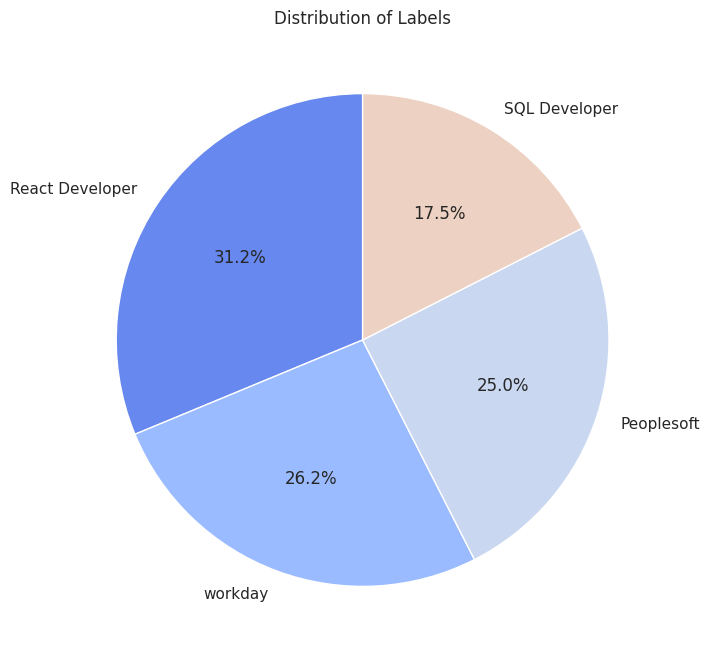

In [ ]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.show()

In [ ]:
df['label'].value_counts()

,count
label,
React Developer,25
workday,21
Peoplesoft,20
SQL Developer,14


In [ ]:
df['label'] = df['label'].map({'React Developer': 0,'workday': 1 ,'Peoplesoft': 2 , 'SQL Developer': 3})

In [ ]:
df

,Unnamed: 0,Text,label
0,0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
1,1,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
2,2,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
3,3,Murali\n\nExperience Summary \n\nI have 6 year...,2
4,4,Murali\n\nExperience Summary \n\nI have 6 year...,2
...,...,...,...
75,75,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,1
76,76,Seeking suitable positions in Workday HCM as ...,1
77,77,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,1
78,78,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,1


In [ ]:
df['Text'][3]

'Murali\n\nExperience Summary \n\nI have 6 years of experience working in PeopleSoft Administration and performing various infrastructure related activities in PeopleSoft environments. \n\nInstalled and configured PeopleSoft 9.0,9.1,9.2 Web server, Application server, Database server and Process scheduler \nserver on Windows, UNIX and Linux platforms.\nCreating Domains for Web server, Application server and Process scheduler server.\nApplied Patches Manually and applied Maintenance Packs through Change Assistant tool.\nExperience in DPKs installations.\nApplying TAX UPDATES and fixes using PUM\nMigrating projects from one environment to another environment using Application Designer and also through CAPI, STAT tools.\nPerformed Single sign on (SSO)Implementation.\nExperience in running Compare Reports between pre and Post Migrations.\nExperience in setting up Client Workstation for Developers and Testers.\nInvolved in Configuration of Integration Broker setting up Between the Modules f

In [ ]:
df['Text'][75]

'Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n(Workday HCM Consultant)\n\n\nPROFESSIONAL SUMMARY:\nAn ERP Consultant with overall\xa05+ years\xa0of professional IT experience with\xa03+ years\xa0of extensive\xa0Workday experience.\nExceptional experience in Workday’s\xa0Core HR, Staffing and Compensation Functional areas.\nHands on experience in Configuring Organizations, Business process and creation of Custom Reports.\nExperienced on Compensation elements configurations and updates.\nInvolved in requirements analysis, integrations, testing and system documentation support.\nCreation of various\xa0calculated fields\xa0to use in custom reports.\nConfiguring\xa0EIB Inbound and Load data into workday with webservices.\nCreation of various custom reports as per the requirements.\nWorking on various enhancements related to EIB Integrations, Custom Reports and Configuration changes.\nExperience with creating\xa0Staffing models for Supervisory Orgs, Reorganizations and business process fr

## Data Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
Lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_data(text):
    cleantext = re.sub(r'http\S+|www\.\S+', '',text)
    cleantext = re.sub(r'@\S+','',cleantext)
    cleantext = re.sub(r'#\S+','',cleantext)
    cleantext = re.sub(r'[^\w\s]','',cleantext)
    cleantext = cleantext.lower()
    words = word_tokenize(cleantext)
    words = [Lemmatizer.lemmatize(word,pos='v') for word in words if not word in stopwords.words('english')]
    cleantext = ' '.join(words)
    return cleantext

In [ ]:
def preprocess_data2(text):
  cleantext = re.sub('[^a-zA-Z]',' ',text)
  return cleantext

In [ ]:
df['Text'] = df['Text'].apply(preprocess_data)

In [ ]:
df['Text'] = df['Text'].apply(preprocess_data2)

In [ ]:
df['Text'][3]

'murali experience summary   years experience work peoplesoft administration perform various infrastructure relate activities peoplesoft environments instal configure peoplesoft        web server application server database server process scheduler server windows unix linux platforms create domains web server application server process scheduler server apply patch manually apply maintenance pack change assistant tool experience dpks installations apply tax update fix use pum migrate project one environment another environment use application designer also capi stat tool perform single sign ssoimplementation experience run compare report pre post migrations experience set client workstation developers testers involve configuration integration broker set modules send message involve     production support client involve run audit report dddaudit sysaudit integrity check experience configuration setup ren server configure maintain report nod settings check clear cache servers involve trou

## Vectorization

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
words = []
for sent in df['Text']:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [ ]:
model = gensim.models.Word2Vec(words)

In [ ]:
model

In [ ]:
model.epochs

5

In [ ]:
len(model.wv.index_to_key)

1003

In [ ]:
model.wv['workday']

array([ 0.09816737,  0.2635377 , -0.0937145 ,  0.22419725,  0.02507721,
       -0.46242315,  0.39568123,  0.48149922, -0.38041604, -0.11432944,
       -0.30826265, -0.22820877, -0.18196782,  0.09573566,  0.1671116 ,
       -0.34466597, -0.33410373, -0.29030606, -0.05643557, -0.34787393,
        0.33753031,  0.29391915,  0.2780096 ,  0.116871  , -0.0889869 ,
       -0.15260732, -0.06222611, -0.12643717, -0.05959341, -0.16345812,
        0.31882536, -0.00538989,  0.20028235, -0.14445858,  0.09286562,
        0.68671256,  0.18554361, -0.06047521, -0.29458097, -0.5874193 ,
       -0.12826149, -0.27045238, -0.18335466,  0.1605198 ,  0.26235878,
       -0.09311514, -0.19055453,  0.27067843,  0.39731008,  0.21217366,
        0.27916822, -0.49359223,  0.13444896, -0.2244538 , -0.35360998,
        0.08111889, -0.13674021, -0.6105806 , -0.5380815 ,  0.01928307,
        0.1355997 ,  0.09411555, -0.09044708, -0.21186526, -0.39476606,
        0.15585822,  0.01796458,  0.63141036, -0.7822147 ,  0.42

In [ ]:
def avg_word_2_vec(doc):
  return np.mean([model.wv[word] for word in doc.split() if word in model.wv.index_to_key],axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Train_df,Test_df = train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
x_Train,y_Train = Train_df['Text'],Train_df['label']
x_Test,y_Test = Test_df['Text'],Test_df['label']

In [ ]:
x_Train_Final = []
for sent in x_Train:
  x_Train_Final.append(avg_word_2_vec(sent))

In [ ]:
x_Test_Final = []
for sent in x_Test:
  x_Test_Final.append(avg_word_2_vec(sent))

## Model Building with Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'SVM':SVC(decision_function_shape='ovo'),
    'KNN':KNeighborsClassifier(),
    'XGBoost':XGBClassifier()
}

In [ ]:
metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train Precision': [],
    'Test Precision': [],
    'Train Recall': [],
    'Test Recall': [],
    'Train F1-Score': [],
    'Test F1-Score': []
}

In [ ]:
for model_name, model in models.items():
    model.fit(x_Train_Final,y_Train)
    y_train_pred = model.predict(x_Train_Final)
    y_test_pred = model.predict(x_Test_Final)

    metrics['Model'].append(model_name)
    metrics['Train Accuracy'].append(accuracy_score(y_Train, y_train_pred))
    metrics['Test Accuracy'].append(accuracy_score(y_Test, y_test_pred))
    metrics['Train Precision'].append(precision_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test Precision'].append(precision_score(y_Test, y_test_pred,average='weighted'))
    metrics['Train Recall'].append(recall_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test Recall'].append(recall_score(y_Test, y_test_pred,average='weighted'))
    metrics['Train F1-Score'].append(f1_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test F1-Score'].append(f1_score(y_Test, y_test_pred,average='weighted'))

In [ ]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,Random Forest,1.000000,0.9375,1.000000,0.946429,1.000000,0.9375,1.000000,0.936432
1,Logistic Regression,0.671875,0.5000,0.613143,0.500000,0.671875,0.5000,0.618390,0.486111
2,Decision Tree Classifier,1.000000,1.0000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
3,SVM,0.296875,0.3750,0.088135,0.140625,0.296875,0.3750,0.135919,0.204545
4,KNN,0.828125,0.6875,0.832978,0.767857,0.828125,0.6875,0.825432,0.681944
5,XGBoost,1.000000,1.0000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


## Visualization

## Comparison of Accuracy

In [ ]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Accuracies By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

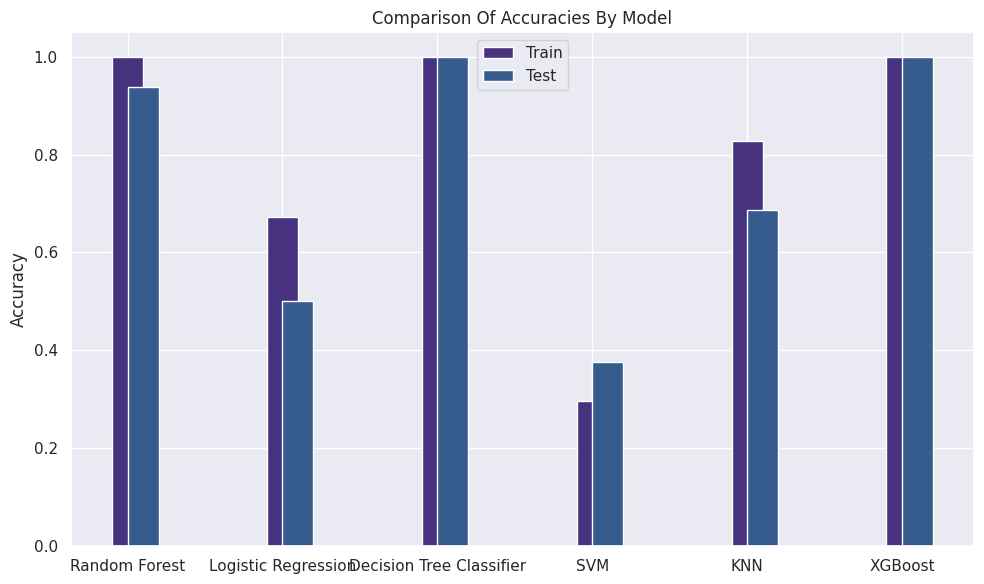

In [ ]:
plot_metric("Train Accuracy", "Test Accuracy", "Accuracy")

## Comparison of Precision

In [ ]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Precision By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

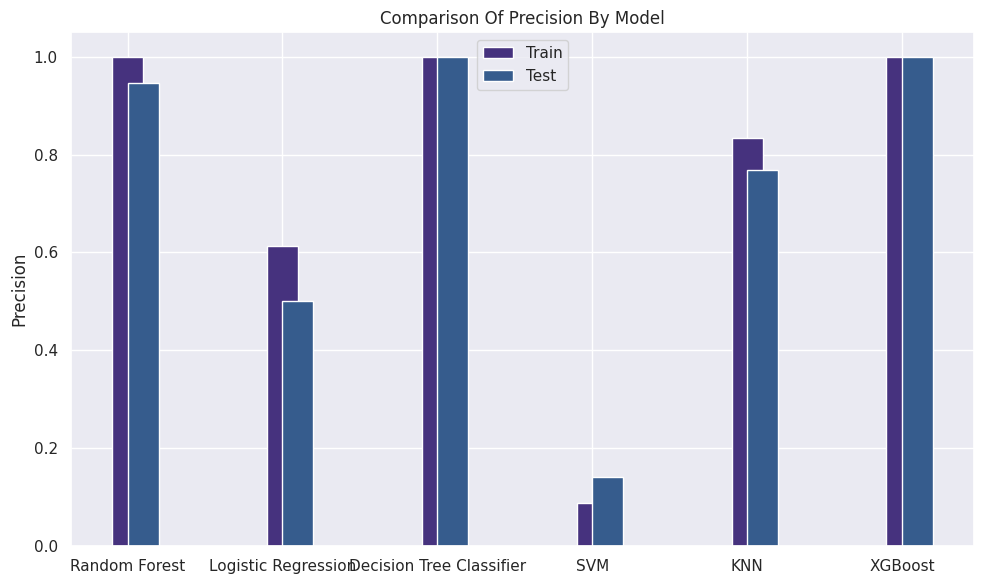

In [ ]:
plot_metric("Train Precision", "Test Precision", "Precision")

## Comparison of Recall

In [ ]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Recall By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

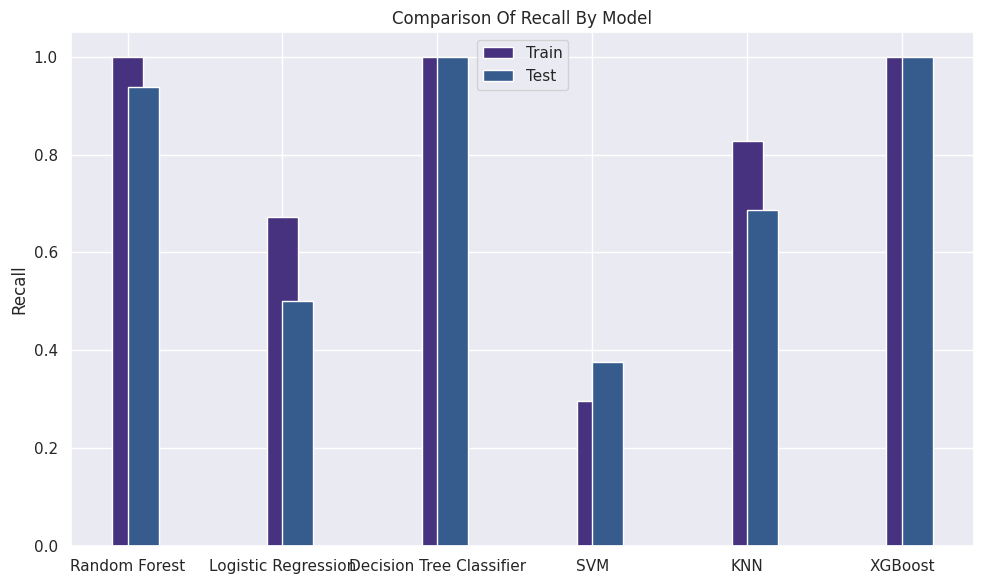

In [ ]:
plot_metric("Train Recall", "Test Recall", "Recall")

## Comparison of F1-Score

In [ ]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of F1-Score By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

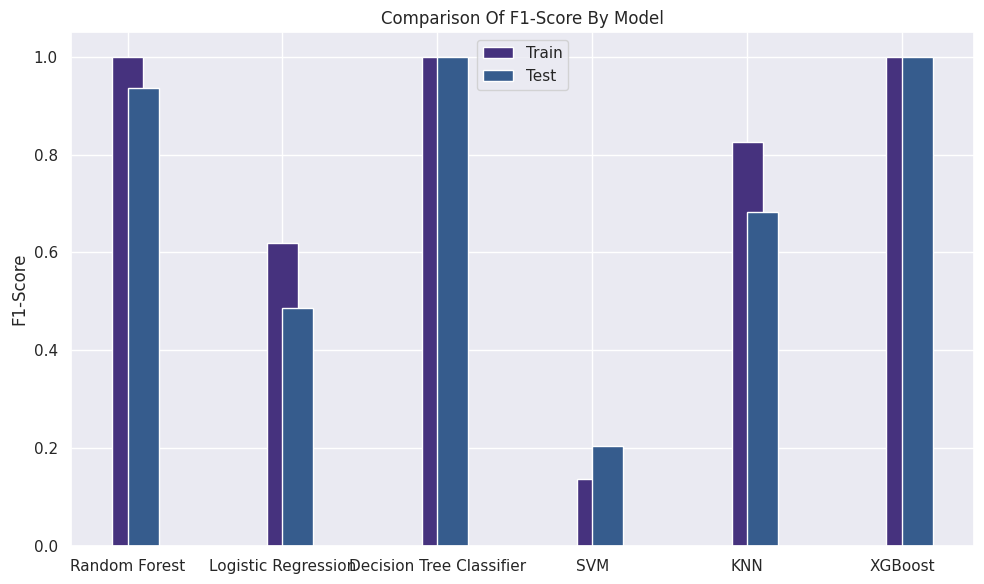

In [ ]:
plot_metric("Train F1-Score", "Test F1-Score", "F1-Score")

## Model Building with Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
DL_df = pd.read_csv('/content/resume_data.csv')
DL_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
DL_df

,Text,label
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
1,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
2,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
4,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
...,...,...
75,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday
76,Seeking suitable positions in Workday HCM as ...,workday
77,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
78,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday


In [ ]:
y = pd.get_dummies(DL_df['label'],dtype=int)

In [ ]:
DL_df.drop(columns=['label'],inplace=True)

In [ ]:
DL_df['Text'] = DL_df['Text'].apply(preprocess_data)

In [ ]:
DL_df['Text'] = DL_df['Text'].apply(preprocess_data2)

In [ ]:
x = DL_df['Text']

In [ ]:
y

,Peoplesoft,React Developer,SQL Developer,workday
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
75,0,0,0,1
76,0,0,0,1
77,0,0,0,1
78,0,0,0,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train_pad = pad_sequences(x_train_seq,maxlen=500,padding='post')
x_test_pad = pad_sequences(x_test_seq,maxlen=500,padding='post')

In [ ]:
x_train_pad.shape,x_test_pad.shape

((64, 500), (16, 500))

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

2885

## Simple RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_rnn.add(SimpleRNN(64,activation='relu',return_sequences=True))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(4,activation='softmax'))

model_rnn.compile(optimizer = Adam(learning_rate=0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_rnn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_67 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_68 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
earlystopping_srnn = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_srnn

In [ ]:
history = model_rnn.fit(
    x_train_pad,y_train,
    epochs=8,
    batch_size = 32,
    validation_data = (x_test_pad,y_test),
    callbacks = earlystopping_srnn
)

Epoch 1/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 829ms/step - accuracy: 0.2812 - loss: 1.4252 - val_accuracy: 0.5625 - val_loss: 1.2178
Epoch 2/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.6458 - loss: 1.1696 - val_accuracy: 0.6250 - val_loss: 1.1359
Epoch 3/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.6042 - loss: 1.0988 - val_accuracy: 0.6250 - val_loss: 1.0811
Epoch 4/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.6146 - loss: 1.0364 - val_accuracy: 0.6250 - val_loss: 1.0128
Epoch 5/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.5833 - loss: 1.0238 - val_accuracy: 0.6875 - val_loss: 0.9786
Epoch 6/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.5833 - loss: 0.9363 - val_accuracy: 0.6875 - val_loss: 0.9430
Epoch 7/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.7396 - loss: 0.8709 - val_accuracy: 0.6250 - val_loss: 0.9508
Epoch 8/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.8438 - loss: 0.8481 - val_accuracy: 0.7500 - val_loss: 0.9200


## LSTM RNN Model

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_lstm.add(LSTM(64,activation='relu',return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(4,activation='softmax'))

model_lstm.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
earlystopping_lstm = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_lstm

In [ ]:
history = model_lstm.fit(
    x_train_pad,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad,y_test),
    callbacks=earlystopping_lstm
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 953ms/step - accuracy: 0.3646 - loss: 1.3808 - val_accuracy: 0.4375 - val_loss: 1.3659
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.4688 - loss: 1.3647 - val_accuracy: 0.4375 - val_loss: 1.3488
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - accuracy: 0.4688 - loss: 1.3483 - val_accuracy: 0.4375 - val_loss: 1.3286
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - accuracy: 0.4375 - loss: 1.3363 - val_accuracy: 0.4375 - val_loss: 1.3066
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.4375 - loss: 1.3177 - val_accuracy: 0.4375 - val_loss: 1.2824
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - accuracy: 0.4271 - loss: 1.3010 - val_accuracy: 0.4375 - val_loss: 1.2589
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.4375 - loss: 1.2651 - val_accuracy: 0.4375 - val_loss: 1.2332
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - accuracy: 0.4271 - loss: 1.2426 - val_accuracy: 0.5625 - val_loss:

## GRU RNN Model

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_gru.add(GRU(100,activation='relu',return_sequences=True))
model_gru.add(GRU(34))
model_gru.add(Dense(4,activation='softmax'))

model_gru.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
earlystopping_gru = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_gru

In [ ]:
history = model_gru.fit(
    x_train_pad,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad,y_test),
    callbacks=earlystopping_gru
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2188 - loss: 1.3849 - val_accuracy: 0.5625 - val_loss: 1.3689
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 0.5417 - loss: 1.3669 - val_accuracy: 0.5625 - val_loss: 1.3507
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.5104 - loss: 1.3545 - val_accuracy: 0.5625 - val_loss: 1.3343
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.5000 - loss: 1.3398 - val_accuracy: 0.6250 - val_loss: 1.3142
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 0.5833 - loss: 1.3132 - val_accuracy: 0.6250 - val_loss: 1.2911
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5417 - loss: 1.3012 - val_accuracy: 0.6250 - val_loss: 1.2678
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - accuracy: 0.5833 - loss: 1.2699 - val_accuracy: 0.6250 - val_loss: 1.2419
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step - accuracy: 0.5208 - loss: 1.2736 - val_accuracy: 0.6250 - val_loss: 1.214